## Regresyon

Tikhonov, Polinom, Basis Function
Validasyon Görselleştirmesi
Gradient Tree Boosting, MLP

In [2]:
#Ortamı hazırlayalım
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Doğrusal regresyon

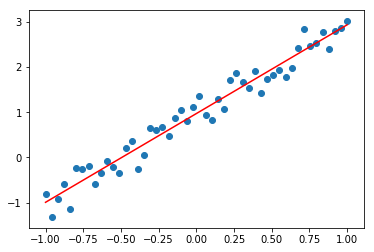

Ortalama Karesel Hata:  0.058744225727840244
R2 puanı:  0.9579357512940261


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = np.linspace(-1,1,50)
X = x[:,np.newaxis]
y = 2*x+1 + np.random.normal(0,0.25,len(x))
lr = LinearRegression(fit_intercept = True)
lr.fit(X,y)
ylr = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,ylr,'r')
plt.show()

print('Ortalama Karesel Hata: ', mean_squared_error(y,ylr))
print('R2 puanı: ', lr.score(X,y))


Scikit-learn kestirim için tasarlanmış. O yüzden istatistiksel hesaplamalara girmiyor. Ancak regresyon parametrelerinin güven aralıkları öznitelik seçimi için kullanılabilir. Bu özelliğe ihtiyaç varsa bir yol gerekli kodu yazmak. Ancak statsmodel kütüphanesinde bu özellik mevcut:

In [4]:
import statsmodels.api as sm
XwithIntercept = sm.add_constant(X)
model = sm.OLS(y,XwithIntercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     1093.
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           1.10e-34
Time:                        12:43:51   Log-Likelihood:              -0.082866
No. Observations:                  50   AIC:                             4.166
Df Residuals:                      48   BIC:                             7.990
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9711      0.035     27.758      0.0

Başka bir örnek

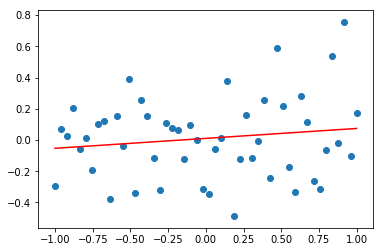

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.025
Date:                Wed, 26 Jun 2019   Prob (F-statistic):              0.316
Time:                        12:43:51   Log-Likelihood:                -2.8746
No. Observations:                  50   AIC:                             9.749
Df Residuals:                      48   BIC:                             13.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0102      0.037      0.277      0.7

In [5]:
yRandom = np.random.normal(0,0.25,len(x))

lrRandom = LinearRegression(fit_intercept = True)
lrRandom.fit(X,yRandom)
ylrRandom = lrRandom.predict(X)

plt.scatter(X,yRandom)
plt.plot(X,ylrRandom,'r')
plt.show()

modelRandom = sm.OLS(yRandom,XwithIntercept).fit()

print(modelRandom.summary())

Çok boyutlu bakalım

In [6]:
x1 = np.linspace(-1,1,50)
x2 = np.linspace( 1,3,len(x1))

yM = -1 + 2*x1 + np.random.normal(0,0.25,len(x1)) #x2 alakasiz

xM = np.column_stack([x1,x2])

lrM  = LinearRegression(fit_intercept = True)
lrM.fit(xM, yM)

print('Sklearnden R2: ', lrM.score(xM,yM))

xMwithIntercept = sm.add_constant(xM)
modelM = sm.OLS(yM,xMwithIntercept).fit()
print(modelM.summary())

Sklearnden R2:  0.9488430684485559
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     890.3
Date:                Wed, 26 Jun 2019   Prob (F-statistic):           1.21e-32
Time:                        12:43:51   Log-Likelihood:                -8.3130
No. Observations:                  50   AIC:                             20.63
Df Residuals:                      48   BIC:                             24.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.

Uyarı: Bu her zaman doğru öznitelikleri verecek anlamına gelmiyor :)

### Polinom Regresyonu

R2:  0.8799915293959523


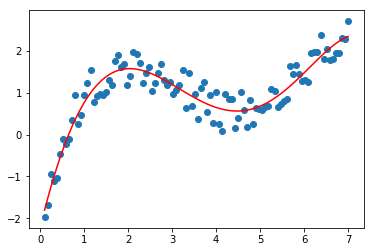

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Pipeline adımlarını hazırlayalım. 5. dereceden seçelim
# include_bias=True yazıp, fit_intercept=False da olabilirdi
stepsPoly = [('poly', PolynomialFeatures(5, include_bias=False)), 
             ('lr', LinearRegression(fit_intercept=True)) ]

#make_pipeline ile de yapabilirdik
pipePoly = Pipeline(stepsPoly)
xP = np.linspace(0.1,7,100)    
#Normal gürültü yerine tekdüze (uniform) gürültü yaratıp biraz daha zorlayalım
yP = np.log(xP) + np.sin(xP) + np.random.uniform(-0.5,0.5,len(xP))#np.random.normal(0,0.25,len(xP))
             
XP = xP[:,np.newaxis]
pipePoly.fit(XP,yP)
print('R2: ', pipePoly.score(XP,yP))
yPredP = pipePoly.predict(XP)

plt.scatter(xP,yP)
plt.plot(xP,yPredP,'r')
plt.show()

Veri polinom olmasa da öğrenebiliyor. Ancak veri görmediğimiz yerden gelseydi bu iyi çalışmaz, o yüzden dikkatli olmak gerekli

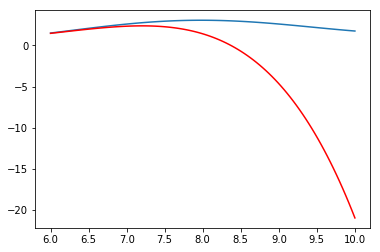

In [8]:
xP2 = np.linspace(6,10,100)
yP2 = np.log(xP2) + np.sin(xP2)
XP2 = xP2[:,np.newaxis]
yPredP2 = pipePoly.predict(XP2)
plt.plot(xP2,yP2)
plt.plot(xP2,yPredP2,'r')
plt.show()


### Başka Fonksiyonlarla Regresyon

Polinomlar dışında da fonksiyon kullanmak mümkün. Gaussian RBF özniteliklerine bakalım. 

R2:  0.8877773647247792


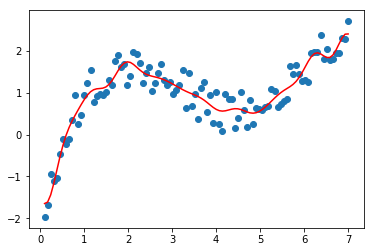

In [9]:
class GaussianRbfFeatures():
    def __init__(self,merkezSayisi=10,genlikKatsayisi=1.0):
        #Merkezleri ve genlikleri veriye göre otomatik ayarlıyoruz
        self.k = merkezSayisi
        self.h = genlikKatsayisi
    
    @staticmethod
    def _rbf(x,c,h):
        return np.exp(-np.sum(((x-c)/h)**2, axis=1))
    
    def fit(self,X,y=None):
        self.merkezler_ = np.linspace(X.min(), X.max(), self.k)
        self.genlikler_ = self.h*(self.merkezler_[1]-self.merkezler_[0])
        return self
    
    def transform(self,X):
        return self._rbf(X[:, :, np.newaxis], self.merkezler_, self.genlikler_)
    
    def fit_transform(self, X, y=None):
        self.fit(X,y)
        return self.transform(X)
        
stepsRBF = [('rbf', GaussianRbfFeatures(20)), 
            ('lr', LinearRegression(fit_intercept=True)) ]

#make_pipeline ile de yapabilirdik
pipeRBF = Pipeline(stepsRBF)
             
pipeRBF.fit(XP,yP)
print('R2: ', pipeRBF.score(XP,yP))
yPredRBF = pipeRBF.predict(XP)

plt.scatter(xP,yP)
plt.plot(xP,yPredRBF,'r')
plt.show()
            

Kendi tanımladığımız öznitelikler üzerinden de hiperparametre arayabiliriz. Ancak bunun öznitelik çıkartan transformerımıza bir takım değişikler yapmamız gerekli

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianRbfFeaturesPipeline(BaseEstimator,TransformerMixin):
    def __init__(self,merkezSayisi=10,genlikKatsayisi=1.0):
        #Merkezleri ve genlikleri veriye göre otomatik ayarlıyoruz
        self.k = merkezSayisi
        self.h = genlikKatsayisi
    
    @staticmethod
    def _rbf(x,c,h):
        return np.exp(-np.sum(((x-c)/h)**2, axis=1))
    
    def fit(self,X,y=None):
        self.merkezler_ = np.linspace(X.min(), X.max(), self.k)
        self.genlikler_ = self.h*(self.merkezler_[1]-self.merkezler_[0])
        return self
    
    def transform(self,X):
        return self._rbf(X[:, :, np.newaxis], self.merkezler_, self.genlikler_)
    
    def fit_transform(self, X, y=None):
        self.fit(X,y)
        return self.transform(X)
    
    def get_params(self, deep=True):
        return {'merkezSayisi':self.k,'genlikKatsayisi':self.h}
    
    def set_params(self, **params):
        self.k = params['merkezSayisi']
        self.h = params['genlikKatsayisi']

R2:  0.8853085155548297
{'rbf__merkezSayisi': 9, 'rbf__genlikKatsayisi': 5.0}


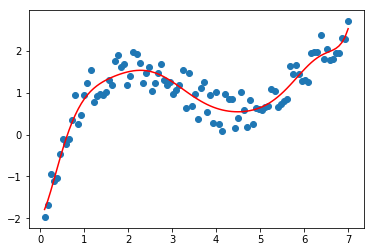

In [11]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.pipeline import make_pipeline

cv = KFold(n_splits=5, shuffle=True)
paramsRBF = {'rbf__merkezSayisi': np.arange(5,20), 
             'rbf__genlikKatsayisi': np.linspace(0.25,5.0,100)}
stepsRBF2 = [('rbf', GaussianRbfFeaturesPipeline()), 
             ('lr', LinearRegression(fit_intercept=True)) ]

pipeRBF2 = Pipeline(stepsRBF2)

rgbCV = RandomizedSearchCV(pipeRBF2, paramsRBF, cv=cv, n_iter=50)
rgbCV.fit(XP,yP)
print('R2: ', rgbCV.score(XP,yP))
yPredRBF2 = rgbCV.predict(XP)
print(rgbCV.best_params_ )
plt.scatter(xP,yP)
plt.plot(xP,yPredRBF2,'r')
plt.show()

Öznitelikler ile doğrusalsızlık ekleyerek daha iyi sonuçlar alabiliyoruz. Ancak burada overfitting durumuna dikkat etmemiz gerekiyor. Bunu hiperparametre taraması yaparak azalttık. Ancak bu tarama süreci vakit alabilir. Öznitelik tanımlamadan bile overfitting mümkün. 

Overfittingi özniteliklerden bağımsız bir şekilde regülarizasyon ile azaltabiliriz. Bunun bir yolu *Ridge Regression*. Eğitim performansını düşürse de overfittinge karşı daha başarılı.

R2:  0.9452760912730026


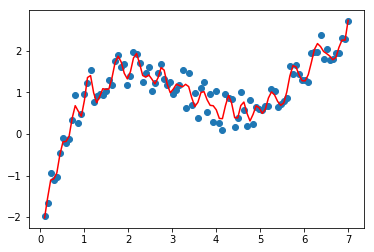

[ -85.53509273  128.92321072 -211.58408866  234.85840627 -291.87589049
  288.76866143 -315.08021461  278.40585395 -271.81932036  212.92692875
 -200.11377882  148.74659293 -154.0102582   130.81940586 -165.73733424
  162.25720631 -201.66033977  191.57704698 -219.96584605  195.15740569
 -205.38401674  162.88833318 -160.47780714  108.72920343  -96.22063311
   32.50782235  -10.68293489  -57.42130282   80.33766923 -147.89478845
  163.87519104 -213.5706592   202.57644049 -222.4324108   184.87573297
 -186.1343293   140.0095427  -142.82173569  107.6729059  -124.49284346
   98.05639399 -115.78457945   90.94958937 -114.84868401   95.75009851
 -118.5109474    94.0272621  -108.19386336   68.20451314  -59.50768588] 41.01839239035866
R2:  0.8606188341717635


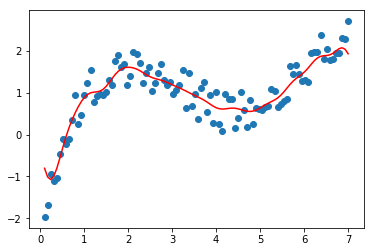

[-9.08861367e-01 -8.14997357e-01 -4.95821078e-01 -2.61982818e-01
 -1.81102870e-01 -1.29404351e-01 -1.61818824e-02  8.39597976e-02
  4.08135792e-02 -5.19934680e-02 -1.36210394e-04  1.58526068e-01
  2.23226244e-01  1.80052886e-01  1.85115850e-01  2.10838135e-01
  1.47309702e-01  8.04996022e-02  1.04907145e-01  1.28078350e-01
  7.58022522e-02  4.07478854e-02  5.77409954e-02  3.29686702e-02
 -2.33960414e-02 -1.93679315e-02 -8.01650514e-03 -7.69560643e-02
 -1.41888051e-01 -1.10529017e-01 -6.16909255e-02 -7.15573804e-02
 -1.07395784e-01 -1.38452375e-01 -1.37951884e-01 -8.37663158e-02
 -2.33852091e-02 -4.01416279e-02 -7.31682514e-02  2.55641999e-02
  1.59974760e-01  1.35932316e-01  7.63812075e-02  1.89287922e-01
  3.43503178e-01  3.10460654e-01  1.79360255e-01  2.15301678e-01
  4.30141673e-01  5.41092907e-01] 0.9512515180215703


In [12]:
from sklearn.linear_model import Ridge

pipeRBF3 = make_pipeline(GaussianRbfFeatures(50,2.), 
                         LinearRegression(fit_intercept=True))
pipeRBF3.fit(XP, yP)
print('R2: ', pipeRBF3.score(XP,yP))
yPredRBF3 =  pipeRBF3.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRBF3,'r')
plt.show()

print(pipeRBF3.named_steps['linearregression'].coef_, pipeRBF3.named_steps['linearregression'].intercept_ )

pipeRbfRidge = make_pipeline(GaussianRbfFeatures(50,2.), 
                             Ridge(alpha=2.0,fit_intercept=True))
pipeRbfRidge.fit(XP, yP)
print('R2: ', pipeRbfRidge.score(XP,yP))
yPredRbfRidge =  pipeRbfRidge.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRbfRidge,'r')
plt.show()

print(pipeRbfRidge.named_steps['ridge'].coef_, pipeRbfRidge.named_steps['ridge'].intercept_ )

Bir de Lasso regresyonu var. Bu yöntem, bazı öznitelikleri 0 olmaya zorluyor.

R2:  0.9044512663005914


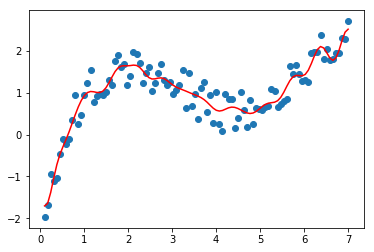

[-2.53776410e+00 -0.00000000e+00 -0.00000000e+00 -8.78126157e-01
 -0.00000000e+00 -1.68118721e-01 -0.00000000e+00  1.79742986e-01
  0.00000000e+00 -4.56407858e-02 -0.00000000e+00  2.39007481e-04
  6.23622832e-01 -0.00000000e+00 -0.00000000e+00  6.38680311e-01
  0.00000000e+00  0.00000000e+00  7.62265429e-02  3.42944375e-01
  0.00000000e+00  0.00000000e+00  1.24758811e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.21843153e-01 -3.12610166e-02 -0.00000000e+00 -9.88849007e-02
 -9.90602723e-02 -1.09445758e-01 -2.49447983e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.23111888e-01 -0.00000000e+00
  4.26749409e-01  1.11468239e-01 -0.00000000e+00  0.00000000e+00
  5.12770395e-01  7.22321979e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.58048538e+00] 0.9246524816931231


In [14]:
from sklearn.linear_model import Lasso

pipeRbfLasso = make_pipeline(GaussianRbfFeatures(50,2.), 
                             Lasso(alpha=0.001, fit_intercept=True))
pipeRbfLasso.fit(XP, yP)
print('R2: ', pipeRbfLasso.score(XP,yP))
yPredRbfLasso =  pipeRbfLasso.predict(XP)
plt.scatter(xP,yP)
plt.plot(xP,yPredRbfLasso,'r')
plt.show()

print(pipeRbfLasso.named_steps['lasso'].coef_, pipeRbfLasso.named_steps['lasso'].intercept_ )

Scikit-Learn içinde başka regresyon algoritmaları da mevcut. Bunlardan bir kaçını scikit-learn içindeki boston veri seti ile deneyelim

Düşük daha iyi:
LinearRegression:  28.596025703286294
RandomForestRegressor:  16.036468108374386
MLPRegressor:  36.32916348185719
GaussianProcessRegressor:  29.678404460803222
GradientBoostingRegressor:  13.575585607508469


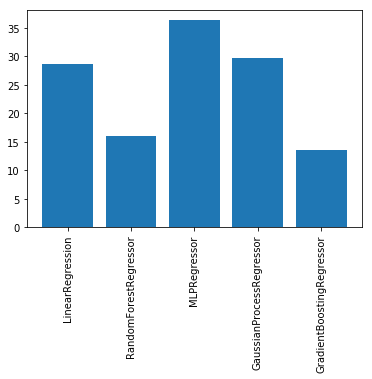

In [16]:
from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import time
seed = int(time.time())

def quickTest(X, y, clf):
    #Her algoritma aynı veri setini görsün diye
    np.random.seed(seed)
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4)
    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    print(type(clf).__name__ + ': ', mean_squared_error(ypred,ytest))
    return type(clf).__name__, mean_squared_error(ypred,ytest)


boston_data = datasets.load_boston()
X = boston_data['data']
y = boston_data['target']

names = ['']*5
errors = [0]*5

print('Düşük daha iyi:')
names[0], errors[0] = quickTest(X,y,LinearRegression(fit_intercept=True))
names[1], errors[1] = quickTest(X,y,RandomForestRegressor(n_estimators=100))
names[2], errors[2] = quickTest(X,y,MLPRegressor(hidden_layer_sizes=(30,), max_iter=10000))
names[3], errors[3] = quickTest(X,y,GaussianProcessRegressor(kernel=DotProduct()+WhiteKernel()))
names[4], errors[4] = quickTest(X,y,GradientBoostingRegressor())

plt.bar(list(range(5)),errors)
plt.xticks(list(range(5)),names,rotation='vertical')
plt.show()